<div>
<div style="text-align: left"> 
<img src="https://cdn.uwec.edu/uwec14/img/fallback-poa-graphic-horizontal.gif" alt="The Power of And at UWEC" style="width: 200px;"  align="left"/>
</div>
<div style="text-align: right"> 
Dani Brake <br> brakeda@uwec.edu
</div>
</div>

# Python for data science -- A quick show

---


My goal here is to show off a little:
* to write a bit of a presentation using Python packages to good effect
* to convince you that learning Python is a good use of your time
* to have a bit of fun, and reinforce my own skills.

---

## 1. Make some data

First, we `import` modules so we can access their functions and data types.

In [1]:
#I like to import my packages straight away.  
import numpy as np               # `as` shortens typing
import pandas as pd              # instead of typing `pandas.bla`
import matplotlib as mpl
import matplotlib.pyplot as plt  #  we get to type `pd.bla`

%config InlineBackend.figure_format = 'retina' # run on a retina mac

Let there be objects

In [2]:
a = [1,3,5,np.nan,6,8]  #np.nan is not-a-number, provided by numpy
pd.Series(a) #spits to screen, because didn't capture into a variable.  bad practice

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

Make some dates

In [3]:
num_pts = 30
dates = pd.date_range('20171031', periods=num_pts) #sensible date format.  embrace it and finally be free
dates[1] #see below?  sensible

Timestamp('2017-11-01 00:00:00', freq='D')

In [4]:
temps = 75*np.cos(np.linspace(0.45, 1.3, num=num_pts)) + 4*(np.random.normal(0,2,num_pts)-0.5)
# see https://docs.scipy.org/doc/numpy-dev/reference/routines.random.html

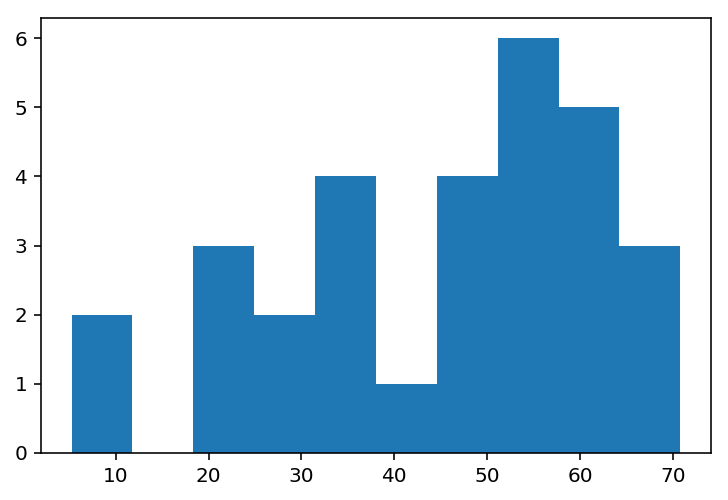

In [5]:
count, bins, ignored = plt.hist(temps)
plt.show()
#inline plots, yay!!!

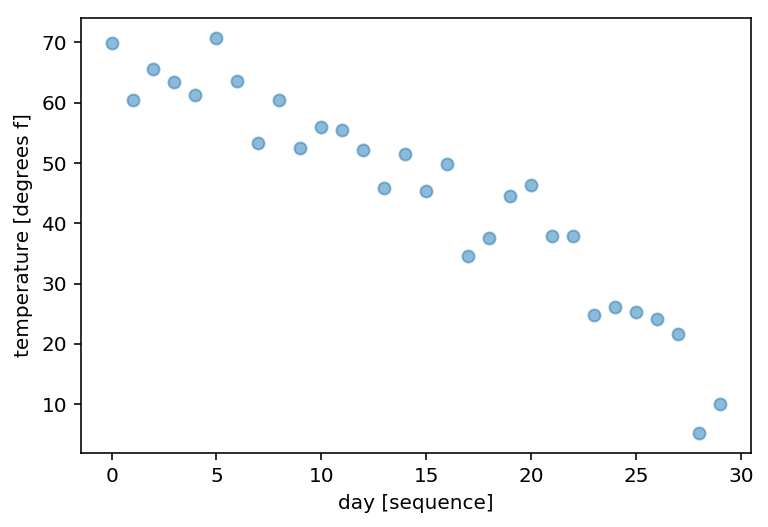

In [6]:
plt.scatter(range(num_pts), temps,   alpha=0.5)
plt.xlabel('day [sequence]')
plt.ylabel('temperature [degrees f]')
plt.show()

---

## 2. Using Pandas

[a nice tutorial on Pandas](https://pandas.pydata.org/pandas-docs/stable/10min.html)

In [7]:
predictions = pd.DataFrame({ 'Date' : dates, 'Temp' : temps})

In [8]:
predictions.dtypes

Date    datetime64[ns]
Temp           float64
dtype: object

This is wonderful!  Pandas is such a nice way to hold data in memory. It has beautiful summary views built right in.  Here's what we get if we just regurgitate `october_predictions` to the screen:

In [9]:
predictions.tail()

,Date,Temp
25,2017-11-25,25.199730
26,2017-11-26,24.109605
27,2017-11-27,21.662458
28,2017-11-28,5.235865
29,2017-11-29,9.982301


That is just so nice.  Wow.

In [10]:
predictions.sort_values(by='Temp', ascending=False).head()

,Date,Temp
5,2017-11-05,70.810972
0,2017-10-31,69.935218
2,2017-11-02,65.673978
6,2017-11-06,63.608486
3,2017-11-03,63.391159


The operation `sort_values` doesn't change `october_predictions at all`.  If you want it to be permanently sorted, you have to capture the result of the operation.

In [11]:
predictions.head()

,Date,Temp
0,2017-10-31,69.935218
1,2017-11-01,60.496858
2,2017-11-02,65.673978
3,2017-11-03,63.391159
4,2017-11-04,61.286606


In [12]:
mu, sigma = predictions.mean(), predictions.std()
print(mu)
print('\n')
print(mu[0])

Temp    45.126179
dtype: float64


45.1261788591


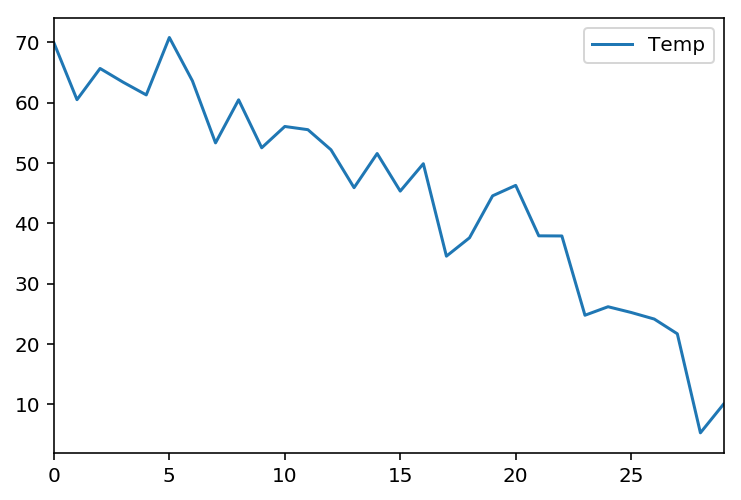

In [13]:
plt.figure(); predictions.plot(); plt.legend(loc='best'); plt.show()

In [14]:
predictions.to_csv('predictions.csv')
# save that data for later.  be a good scientist and save your data

---

## 3. Board game analysis

https://www.kaggle.com/gabrio/board-games-dataset
https://www.kaggle.com/gabrio/board-games-dataset/downloads/board-games-dataset.zip
^^^ a .zip file containing a sql database of board game information

In [15]:
import sqlite3
path_to_db = "./database.sqlite" #BoardGames
table_name = 'BoardGames'

def to_csv(path_to_db):
    db = sqlite3.connect(path_to_db)
    cursor = db.cursor()
    cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
    tables = cursor.fetchall()
    print(tables)
    table_name = 'BoardGames'
    games = pd.read_sql_query("SELECT * from %s" % table_name, db)
    games.to_csv(table_name + '.csv', index_label='index')

def get_table_names(path_to_db):
    db = sqlite3.connect(path_to_db)
    cursor = db.cursor()
    cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
    tables = cursor.fetchall()
    names = [x[0] for x in tables]
    return names
    
t_names = get_table_names(path_to_db)
to_csv(path_to_db)

[('BoardGames',), ('bgg.ldaOut.topics',), ('bgg.ldaOut.top.terms',), ('bgg.ldaOut.top.documents',), ('bgg.topics',)]


In [16]:
game_frame = pd.read_csv(table_name + '.csv')

/Users/ofloveandhate/anaconda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (69) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Groovy, converted csv data file read into memory.  Let's peek into it a little.

In [17]:
game_frame.head()

,index,row_names,game.id,game.type,details.description,details.image,details.maxplayers,details.maxplaytime,details.minage,details.minplayers,...,stats.family.arcade.bayesaverage,stats.family.arcade.pos,stats.family.atarist.bayesaverage,stats.family.atarist.pos,stats.family.commodore64.bayesaverage,stats.family.commodore64.pos,stats.subtype.rpgitem.bayesaverage,stats.subtype.rpgitem.pos,stats.subtype.videogame.bayesaverage,stats.subtype.videogame.pos
0,0,1,1,boardgame,Die Macher is a game about seven sequential po...,//cf.geekdo-images.com/images/pic159509.jpg,5.0,240.0,14.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2,2,boardgame,Dragonmaster is a trick-taking card game based...,//cf.geekdo-images.com/images/pic184174.jpg,4.0,30.0,12.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,3,3,boardgame,"Part of the Knizia tile-laying trilogy, Samura...",//cf.geekdo-images.com/images/pic3211873.jpg,4.0,60.0,10.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,4,4,boardgame,When you see the triangular box and the luxuri...,//cf.geekdo-images.com/images/pic285299.jpg,4.0,60.0,12.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,5,5,boardgame,"In Acquire, each player strategically invests ...",//cf.geekdo-images.com/images/pic342163.jpg,6.0,90.0,12.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
game_frame.tail()

,index,row_names,game.id,game.type,details.description,details.image,details.maxplayers,details.maxplaytime,details.minage,details.minplayers,...,stats.family.arcade.bayesaverage,stats.family.arcade.pos,stats.family.atarist.bayesaverage,stats.family.atarist.pos,stats.family.commodore64.bayesaverage,stats.family.commodore64.pos,stats.subtype.rpgitem.bayesaverage,stats.subtype.rpgitem.pos,stats.subtype.videogame.bayesaverage,stats.subtype.videogame.pos
90395,90395,90396,220053,boardgame,Soldier Ball is a tabletop skill and strategy ...,//cf.geekdo-images.com/images/pic3436079.jpg,2.0,15.0,4.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
90396,90396,90397,220055,boardgame,Description from the designer:&#10;&#10;The ye...,//cf.geekdo-images.com/images/pic3529002.jpg,4.0,45.0,14.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
90397,90397,90398,220068,boardgameexpansion,Cecrops founded Athens and judged a competitio...,//cf.geekdo-images.com/images/pic3503602.jpg,4.0,90.0,14.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
90398,90398,90399,220069,boardgameexpansion,"The famous Myrmidons are the army of Achilles,...",//cf.geekdo-images.com/images/pic3437871.jpg,4.0,90.0,14.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
90399,90399,90400,220070,boardgame,A snowbound small village. It quietly approach...,NaN,6.0,20.0,12.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Neat, we have data in memory.  What columns do we have?

In [19]:
game_frame.columns

Index(['index', 'row_names', 'game.id', 'game.type', 'details.description',
       'details.image', 'details.maxplayers', 'details.maxplaytime',
       'details.minage', 'details.minplayers', 'details.minplaytime',
       'details.name', 'details.playingtime', 'details.thumbnail',
       'details.yearpublished', 'attributes.boardgameartist',
       'attributes.boardgamecategory', 'attributes.boardgamecompilation',
       'attributes.boardgamedesigner', 'attributes.boardgameexpansion',
       'attributes.boardgamefamily', 'attributes.boardgameimplementation',
       'attributes.boardgameintegration', 'attributes.boardgamemechanic',
       'attributes.boardgamepublisher', 'attributes.total', 'stats.average',
       'stats.averageweight', 'stats.bayesaverage',
       'stats.family.abstracts.bayesaverage', 'stats.family.abstracts.pos',
       'stats.family.cgs.bayesaverage', 'stats.family.cgs.pos',
       'stats.family.childrensgames.bayesaverage',
       'stats.family.childrensgames.pos',

Cool, those are the pieces of data we have to work with.  Let's just do a vanilla call to `plot` and see what happens:

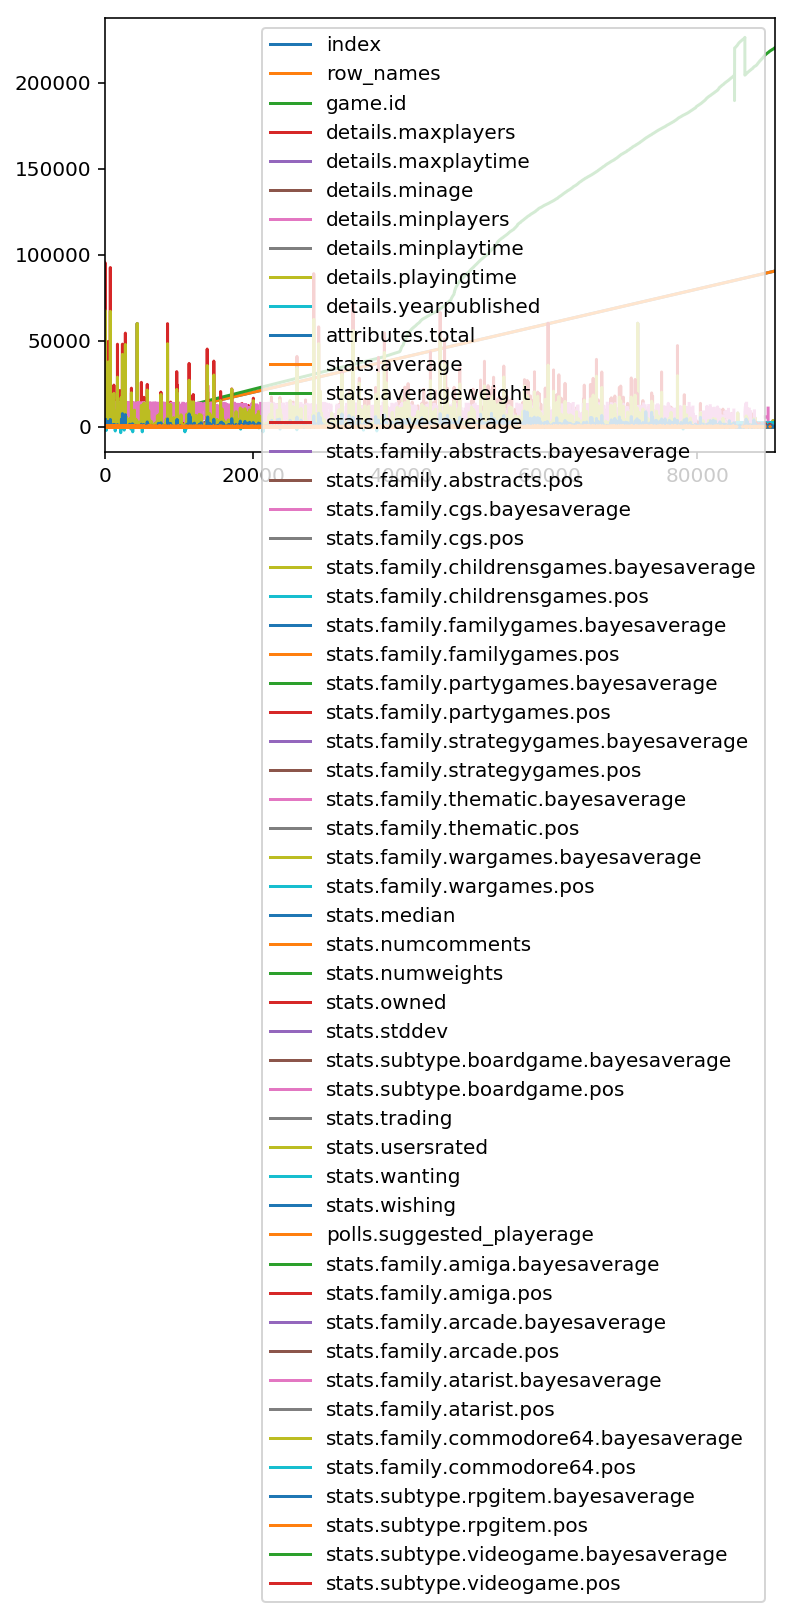

In [20]:
game_frame.plot()
plt.show()

Not the most interesting plot...  Let's drill down on some specific data.

60120.0 0.0


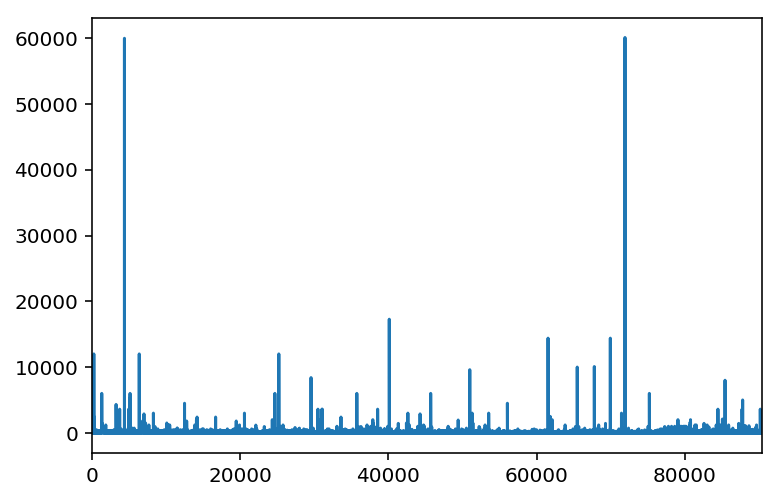

In [21]:
playtime = game_frame['details.maxplaytime']
playtime.head()
print(playtime.max(), playtime.min())

playtime.plot()
plt.show()

In [22]:
boardgames = game_frame[game_frame['game.type'].isin(['boardgame'])]

boardgames

,index,row_names,game.id,game.type,details.description,details.image,details.maxplayers,details.maxplaytime,details.minage,details.minplayers,...,stats.family.arcade.bayesaverage,stats.family.arcade.pos,stats.family.atarist.bayesaverage,stats.family.atarist.pos,stats.family.commodore64.bayesaverage,stats.family.commodore64.pos,stats.subtype.rpgitem.bayesaverage,stats.subtype.rpgitem.pos,stats.subtype.videogame.bayesaverage,stats.subtype.videogame.pos
0,0,1,1,boardgame,Die Macher is a game about seven sequential po...,//cf.geekdo-images.com/images/pic159509.jpg,5.0,240.0,14.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2,2,boardgame,Dragonmaster is a trick-taking card game based...,//cf.geekdo-images.com/images/pic184174.jpg,4.0,30.0,12.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,3,3,boardgame,"Part of the Knizia tile-laying trilogy, Samura...",//cf.geekdo-images.com/images/pic3211873.jpg,4.0,60.0,10.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,4,4,boardgame,When you see the triangular box and the luxuri...,//cf.geekdo-images.com/images/pic285299.jpg,4.0,60.0,12.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,5,5,boardgame,"In Acquire, each player strategically invests ...",//cf.geekdo-images.com/images/pic342163.jpg,6.0,90.0,12.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,5,6,6,boardgame,"In the ancient lands along the Mediterranean, ...",//cf.geekdo-images.com/images/pic28424.jpg,6.0,240.0,12.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,6,7,7,boardgame,"In Cathedral, each player has a set of pieces ...",//cf.geekdo-images.com/images/pic181642.jpg,2.0,20.0,8.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,7,8,8,boardgame,"In this interesting offering from Warfrog, pla...",//cf.geekdo-images.com/images/pic374320.jpg,5.0,120.0,12.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,8,9,9,boardgame,"Although referred to as a sequel to El Grande,...",//cf.geekdo-images.com/images/pic1731731.jpg,4.0,90.0,13.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,9,10,10,boardgame,Elfenland is a redesign of the original White ...,//cf.geekdo-images.com/images/pic1798136.jpg,6.0,60.0,10.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
cats = boardgames['attributes.boardgamecategory']
cats.at[0].split(',')

['Economic', 'Negotiation', 'Political']

In [24]:

category_names = set([])
for index, row in cats.iteritems():
    curr_cats = row
    if isinstance(curr_cats, str): #https://stackoverflow.com/questions/4843173/how-to-check-if-type-of-a-variable-is-string
        for y in curr_cats.split(','):
            category_names.add(y)

len(category_names)

84

In [25]:
import plotly.plotly as py
import plotly.graph_objs as go

In [26]:
num_samples = 10000
cutoff_year = 1960
min_age = 1;
modern = boardgames[boardgames["details.yearpublished"]>cutoff_year]
reasonable_age = modern[modern["details.minage"]>=min_age]
subsample = reasonable_age.sample(num_samples)

years = subsample["details.yearpublished"].unique()
meanage = [ subsample[subsample["details.yearpublished"]==x]["details.minage"].mean() for x in years]
stddev = [ subsample[subsample["details.yearpublished"]==x]["details.minage"].std() for x in years]


df = pd.DataFrame({'years':years,'age':meanage,'std':stddev}).sort_values(by='years', ascending=True)

Now we have some prepared data, ready to send to Plotly for plotting

In [27]:
plotme = []

plotme.append( go.Scatter( x = subsample["details.yearpublished"], y = subsample["details.minage"],mode='markers',name='raw data') )
plotme.append( go.Scatter( x = df['years'], y=df['age'], mode='lines', name='mean') ) 
plotme.append( go.Scatter( x = df['years'], y=df['age']+df['std'], mode='lines', name='+stddev') ) 
plotme.append( go.Scatter( x = df['years'], y=df['age']-df['std'], mode='lines', name='-stddev') ) 
 

# iplot to render the plot in this page.  sadly, plotly requires an internet connection
# and an account
py.iplot(plotme, filename='minage_vs_year')

High five! You successfully sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~danielleamethyst/0 or inside your plot.ly account where it is named 'minage_vs_year'


That's all I have for now.  Thanks for reading!